<a href="https://colab.research.google.com/github/belanasaikiran/Team-6-Big-Data-Project/blob/main/temp/Car_Make_Model_Detection_Resnet50_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Model Detection:

### Team 6:

## Todo:
- [x] Import the DataSet.
- [x] Preprocessing
- [ ] Feature Selection
- [ ] Model Selection
- [ ] Training the Model

In [1]:
# !rm -r DataSet/ A Simple reset call to delete DataSet folder. Use it at caution

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/MyDrive/DataSet/DataSet.zip > /dev/null # output to null

Checking if image dataset is loaded

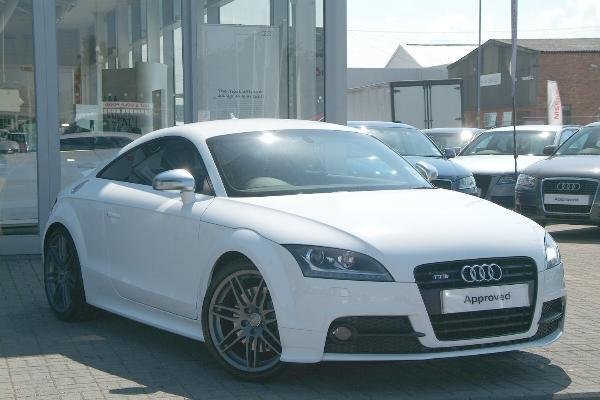

In [4]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('DataSet/images/cars_train/00001.jpg')
img

In [5]:
print(img.width, img.height)

600 400


In [6]:
import numpy as np
import pandas as pd

In [7]:
metadata = pd.read_csv("DataSet/data/meta.csv")

In [8]:
print("Meta Data: \n")
print("Head:")
print(metadata.head())
print("\n Info:")
print(metadata.info())
print("\n Columns:")
print(metadata.columns)

Meta Data: 

Head:
   Unnamed: 0                  class_name
0           1  AM General Hummer SUV 2000
1           2         Acura RL Sedan 2012
2           3         Acura TL Sedan 2012
3           4        Acura TL Type-S 2008
4           5        Acura TSX Sedan 2012

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  196 non-null    int64 
 1   class_name  196 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB
None

 Columns:
Index(['Unnamed: 0', 'class_name'], dtype='object')


## Load the Train & Test Datasets

### Train Data

In [9]:
train_data = pd.read_csv("DataSet/data/train.csv")

print("\n Train Data: \nHead: ")
train_data.head()
print("\nDescribe:")
print(train_data.describe())
print("\nInfo:")
print(train_data.info())
print("\nColumns:")
print(train_data.columns)
print("\nShape:")
print(train_data.shape)


 Train Data: 
Head: 

Describe:
         Unnamed: 0            x1            y1            x2            y2  \
count  12948.000000  12948.000000  12948.000000  12948.000000  12948.000000   
mean    3451.892339     64.701189    108.592833    638.598625    416.670683   
std     2200.262018     81.774972    106.195279    409.613163    272.818630   
min        0.000000      1.000000      1.000000     76.000000     41.000000   
25%     1618.000000     19.000000     42.000000    394.000000    250.000000   
50%     3236.500000     39.000000     80.000000    572.000000    361.000000   
75%     4906.250000     78.000000    138.000000    742.250000    475.000000   
max     8143.000000   1648.000000   1651.000000   5205.000000   3389.000000   

              class  
count  12948.000000  
mean      99.008573  
std       56.540538  
min        1.000000  
25%       50.000000  
50%       99.000000  
75%      148.000000  
max      196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

### Test Data

In [10]:
test_data = pd.read_csv("DataSet/data/test.csv") #load test data


print("\n Train Data: \nHead: ")
test_data.head()
print("\nDescribe:")
print(test_data.describe())
print("\nInfo:")
print(test_data.info())
print("\nColumns:")
print(test_data.columns)
print("\nShape:")
print(test_data.shape)


 Train Data: 
Head: 

Describe:
        Unnamed: 0           x1           y1           x2           y2  \
count  3237.000000  3237.000000  3237.000000  3237.000000  3237.000000   
mean   1618.000000    66.103491   106.835650   639.691999   417.637010   
std     934.585737    84.198376   106.736782   417.499266   279.758425   
min       0.000000     1.000000     1.000000    72.000000    49.000000   
25%     809.000000    18.000000    40.000000   389.000000   242.000000   
50%    1618.000000    39.000000    77.000000   573.000000   363.000000   
75%    2427.000000    80.000000   135.000000   763.000000   487.000000   
max    3236.000000   872.000000  1311.000000  7224.000000  3835.000000   

             class  
count  3237.000000  
mean     98.852950  
std      56.359186  
min       1.000000  
25%      51.000000  
50%      99.000000  
75%     148.000000  
max     196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3237 entries, 0 to 3236
Data columns (total 7 columns)

**Let's get an Average of images available per class**

We should get around 66 images per class with the `stanford car dataset`

In [11]:
counter = 0 #no. of images available per class in our dataset
average = 0 #average no. of images availabe for all our classes for training

for y in range(1, 197):
  for x in train_data['class']:
    if (x == y):
      # print("x, y", x, y)
      counter = counter+1;
  average = (average + counter)/y


print("Average:", average)

Average: 66.4000624886608


### Image Resising and Fixing the `fname` for one of the value in CSV

In [12]:
from PIL import Image
import os

In [13]:
# fix the file names here
train_data.loc[9998, 'fname'] = '09999.jpg'

The below function does the resizing of all our images to the specified resolution

In [14]:
# # Define the resize function

# def resize_image_and_bbox(image_path, new_size, bbox):
#   image = Image.open(image_path)
#   original_size = image.size


#   resized_image = image.resize(new_size)

#   scale_x = new_size[0] / original_size[0]
#   scale_y = new_size[1] / original_size[1]

#   resized_bbox = np.array(bbox) * [scale_x, scale_y, scale_x, scale_y]

#   # Uncomment to verify the parameters when using this function
#   # if(image_path == 'DataSet/images/cars_train/00001.jpg'):
#   #   print("Image Size: ", original_size)
#   #   print("Scale_X: ", scale_x)
#   #   print("np.array(bbox): ", np.array(bbox))
#   #   print("Original bbox: ", bbox)
#   #   print("Resized_bbox: ", resized_bbox.tolist())

#   return resized_image, resized_bbox.tolist()

resizing the images to 128x128 resolution

In [15]:
new_size = (128,128)

Creating a variable for resized data that we can use to update the bounding box information

In [16]:
train_data_resized = train_data.copy()
train_data_resized.shape

(12948, 7)

In [17]:
# train_data.head(10000)

## ***Before I resize the images, I wanna see the small resolution image available in the dataset to avoid any mis handling of images during the training phase of dataset***

In [18]:
temp_width = 190000 # some random value which should be high to compare and get the smallest width(px size) of the available images in the dataset
temp_height = 19000

smallest_width_image = ""
smallest_height_image = ""


def ImageSizeChecker():
  global temp_width, temp_height, smallest_height_image, smallest_width_image
  # print(train_data['fname'][0])
  for i in range(1, 12948):
    image_path = 'DataSet/images/cars_train/' + train_data['fname'][i]
    img = tf.keras.preprocessing.image.load_img(image_path)
    # print(img.width, img.height)
    if (img.width < temp_width):
      temp_width = img.width
      smallest_width_image = train_data['fname'][i]
      # print("Image Width Size for ", i, "th image: ",  temp_width)
    if (img.height < temp_height):
      temp_height = img.width
      smallest_height_image = train_data['fname'][i]
      # print("Image height Size for ", i, "th image: ",  temp_width)
    if i == 12947:
      print("END")
      print(temp_width, temp_height)
      print(smallest_width_image, smallest_height_image)


ImageSizeChecker()



END
78 96
00097.jpg 12942.jpg


Checking which images have low resolution

train_data name 00097.jpg
train_data name 12942.jpg


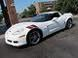

In [19]:
small_image_1 = 'DataSet/images/cars_train/' + train_data['fname'][96]
print("train_data name", train_data['fname'][96])
img1 = tf.keras.preprocessing.image.load_img(small_image_1)


small_image_2 = 'DataSet/images/cars_train/' + train_data['fname'][12941]
print("train_data name", train_data['fname'][12941])
img2 = tf.keras.preprocessing.image.load_img(small_image_2)
img1

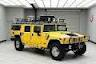

In [20]:
img2

### Crop and Resize the Training DataSet images to 224x224 pixels:

> Cropping the images using bounding boxes and separating the images into their respective folders accoringly.

*   Read the dataset from CSV file
*   Iterate over each image, resize it and its bounding box in CSV
*   Crop the image using bounding box coordinates
*   Resize the croppedImage to 224x224 pixels (CNNs can easily train on square images)
*   Save the cropped resize image
*   ~~Update the bounding box coordinates in the new dataframe called `train_data_resized`.~~

> Resizing the dataset to a square size  helps in training the model much faster as we deal with image datasets which inturn uses matrix multiplications for this type of problem




 **Resizing the images to 224x224 resolution**

> ***Choosing 224x224 as an ideal choice since it may contain more details of each car for classification***

In [21]:
new_size = (224,224)

In [22]:
# Image Cropper Function
def ImageCropper(save_path, class_name, image_path, x1, y1, x2, y2):
  im = Image.open(image_path);
  croppedImage = im.crop((x1, y1, x2, y2))

  # print("Cropping Finished")
  filename = os.path.basename(image_path)
  # class_image_save_path = save_path + "/" + str(class_name) + "/" # this line separates all the images to separate folders according to the class no.
  class_image_save_path = save_path + "/"


  resized_image = croppedImage.resize(new_size)

  #save the resized image
  if not os.path.exists(class_image_save_path):
    os.makedirs(class_image_save_path)

  resized_image.save(os.path.join(class_image_save_path, filename))



In [23]:
!rm -r DataSet/croppedResizedImages/

rm: cannot remove 'DataSet/croppedResizedImages/': No such file or directory


In [24]:
# dataset folder
dataset_image_folder = 'DataSet/images/cars_train/'

cropped_images_save_path ='DataSet/croppedResizedImages' #setting a custom path for storing the resized data

In [25]:
print(len(train_data))

12948


In [26]:
# process each image - cropping
for index, row in train_data.iterrows():

  # Call the image cropper function
  ImageCropper(cropped_images_save_path, train_data['class'][index] , dataset_image_folder + train_data['fname'][index], train_data['x1'][index], train_data['y1'][index], train_data['x2'][index], train_data['y2'][index])

  if index == len(train_data) - 1:
    print("All Images have been cropped")


All Images have been cropped


Creating a variable for resized data that we can use to update the bounding box information

In [27]:
train_data_resized = train_data.copy()
train_data_resized.shape

(12948, 7)

In [28]:
# !ls DataSet/images/cars_train #uncomment to see the show the no. of images we have

In [29]:
# !ls DataSet/resized_images/ #let's see the count of resized cropped images.

In [30]:
train_data_resized = train_data_resized.drop(columns=["x1", "y1", "x2", "y2"])

In [31]:
train_data_resized.head()

,Unnamed: 0,class,fname
0,0,14,00001.jpg
1,1,3,00002.jpg
2,2,91,00003.jpg
3,3,134,00004.jpg
4,4,106,00005.jpg


## Check the resized image.

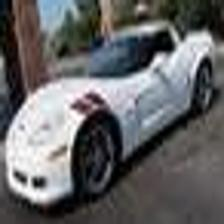

In [32]:
scaled_img = tf.keras.preprocessing.image.load_img('DataSet/croppedResizedImages/00097.jpg')
scaled_img

Split data into Training and validation set

In [33]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [34]:
X_train = train_data_resized.drop(columns=["class"])  # Features
y_train = train_data_resized["class"]  # Target variable which in our case is class

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) #training set 80% validation set 20%

In [36]:
X_train.shape

(10358, 2)

In [37]:
X_val.shape

(2590, 2)

In [38]:
y_train.shape

(10358,)

In [39]:
y_val.shape

(2590,)

In [40]:
X_train.head()

,Unnamed: 0,fname
6821,6821,06822.jpg
2498,2498,02499.jpg
1851,1851,01852.jpg
8128,8128,08129.jpg
4533,4533,04534.jpg


#Prepare the Data for Machine Learning Algorithms

Checking we have any missing value

In [41]:
sample_incomplete_rows = train_data_resized[train_data_resized.isnull().any(axis=1)].head() #maybe we don't have any missing data
pd.set_option('display.max_columns', None)
sample_incomplete_rows

,Unnamed: 0,class,fname


> WE DON'T HAVE TO DO NORMALIZATION AS WE DID IT WHEN WE RESIZED THE IMAGES TO SAME RESOLUTION


### This step helps in training the transfer learning model much easier.

# Load all the Images to start traning


In [42]:
import cv2  # Or from PIL import Image  if using Pillow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Define data paths

In [43]:
image_train_data_dir = "DataSet/croppedResizedImages/"
# test_data_dir = "" # let's redefine it later

In [44]:
def load_image(filepath, target_size=(224, 224)):  # Adjust target size if needed
    img = cv2.imread(filepath)  # Or img = Image.open(filepath) for Pillow
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if using OpenCV
    img = cv2.resize(img, target_size)
    return img

### Prepare Training Data

Creating a dictionary to map image filenames to their corresponding class labels

In [45]:
image_label_map = dict(zip(train_data_resized["fname"], train_data_resized["class"]))  # Adjust column names if needed

###  Data Augmentation (Highly Recommended):

Create an ImageDataGenerator object to perform on-the-fly data augmentation during training, which helps prevent overfitting and improve model generalization perform Data Augmentation

> **In Simple, we generate different transformations of images to increase the image dataset size and balance it for our training since we are extremely dealing with very small dataset.**

Since the dataset is limited, augmenting our data artificially increasing the diversity of our training data.

In [46]:
# Convert "class" column to string before using flow_from_dataframe
train_data_resized['class'] = train_data_resized['class'].astype(str)

In [48]:
# train_data_df = pd.concat([X_train, y_train], axis=1)
# train_data.columns = ['fname', 'class']

In [49]:
train_datagen = ImageDataGenerator(
    rescale=1./255,                  # Normalize pixel values
    rotation_range=10,               # Slight rotation, assuming cars are mostly upright
    width_shift_range=0.1,           # Horizontal shifts, simulating different angles
    height_shift_range=0.1,          # Vertical shifts, cars at different distances
    shear_range=0.1,                 # Shear, simulating camera angle changes
    zoom_range=0.2,                  # Zoom, simulating cars moving closer or further away
    horizontal_flip=True,            # Flip, cars can appear in either orientation on a road
    brightness_range=[0.8,1.2],      # Brightness, different lighting conditions
    fill_mode='nearest',             # Fill mode, to handle new pixels after a shift or rotation
    validation_split=0.2             # Use 20% of images for validation
)

# Reducing the rotation range for vehicle data is based on the assumption that, in real-world scenarios, vehicles are typically seen upright, and significant rotations (like those you might see with arbitrary objects) are not common.
# Vehicles rarely, if ever, appear upside-down or at steep angles in standard road scenes.


In [50]:
train_datagen

### Load and Augment Training Data:

Use train_datagen.flow_from_directory to automatically load, preprocess, and augment images from your training directory:

Use train_datagen.flow_from_dataframe to generate batches of images and labels from your DataFrame:

In [51]:
X_train

,Unnamed: 0,fname
6821,6821,06822.jpg
2498,2498,02499.jpg
1851,1851,01852.jpg
8128,8128,08129.jpg
4533,4533,04534.jpg
...,...,...
11964,3820,11965.jpg
5191,5191,05192.jpg
5390,5390,05391.jpg
860,860,00861.jpg


In [81]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data_resized,
    directory=image_train_data_dir,  # Point to the image directory
    x_col="fname",  # Column containing image filenames (adjust if needed)
    y_col="class",  # Column containing class labels (adjust if needed)
    target_size=(224, 224),  # Adjust target size if needed
    batch_size=8,  # Adjust batch size as needed
    class_mode='categorical',  # Multi-class classification
    shuffle=True,  # Shuffle data for better training
    seed=42,  # For reproducibility of data shuffling and augmentations.
    # validation_split=0.2,
    subset='training',  # Specify this is for validation data
)


Found 10359 validated image filenames belonging to 196 classes.


In [80]:
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data_resized,
    directory=image_train_data_dir,  # Point to the image directory
    x_col="fname",  # Column containing image filenames (adjust if needed)
    y_col="class",  # Column containing class labels (adjust if needed)
    target_size=(224, 224),  # Adjust target size if needed
    batch_size=8,  # Adjust batch size as needed
    class_mode='categorical',  # Multi-class classification
    shuffle=True,  # Shuffle data for better training
    seed=42,  # For reproducibility of data shuffling and augmentations.
    # validation_split=0.2,
    subset='validation',  # Specify this is for validation data
)


Found 2589 validated image filenames belonging to 196 classes.


# PENDING FROM HERE

## Imporing ResNet50 to the Transfer learning as the training data for each class is minimal in our dataset

In [71]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [72]:
model = Sequential([ResNet50(include_top=False, weights='imagenet', pooling='avg'), Dense(196, activation='softmax')])

In [73]:
model.layers[0].trainable = False # Freeze the layers except for last one

In [74]:
model

In [75]:
# Compile the model for training with your specific optimizer and loss function
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [76]:
# Train the model on your car image dataset (data preparation not shown here)
# model.fit(train_generator, your_training_labels, epochs=10)

In [77]:
# Use the trained model for car make/model prediction on new images
# predictions = model.predict(your_new_image)

In [82]:
len(train_generator)

1295

In [ ]:
# Train the model on the training data
# model.fit(
#     train_generator,
#     validation_generator,
#     epochs=10,  # Adjust the number of epochs as needed
#     # steps_per_epoch=len(train_generator)  # Adjust if using validation split
# )

model.fit(
    train_generator,
    epochs=50,  # Adjust according to your needs
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/50
1295/1295 [==============================] - 212s 163ms/step - loss: 5.5076 - accuracy: 0.0078 - val_loss: 5.4195 - val_accuracy: 0.0116
Epoch 2/50
1295/1295 [==============================] - 208s 161ms/step - loss: 5.4159 - accuracy: 0.0092 - val_loss: 5.4095 - val_accuracy: 0.0127
Epoch 3/50
1295/1295 [==============================] - 210s 162ms/step - loss: 5.3655 - accuracy: 0.0120 - val_loss: 5.3772 - val_accuracy: 0.0112
Epoch 4/50
1295/1295 [==============================] - 208s 161ms/step - loss: 5.3128 - accuracy: 0.0151 - val_loss: 5.3396 - val_accuracy: 0.0139
Epoch 5/50
1295/1295 [==============================] - 207s 160ms/step - loss: 5.2832 - accuracy: 0.0153 - val_loss: 5.2982 - val_accuracy: 0.0100
Epoch 6/50
1295/1295 [==============================] - 207s 160ms/step - loss: 5.2468 - accuracy: 0.0188 - val_loss: 5.2794 - val_accuracy: 0.0143
Epoch 7/50
1295/1295 [==============================] - 207s 160ms/step - loss: 5.2155 - accuracy: 0.0195 - val_

> **NOTE:** It is best to have validation set for evaluating the performance